# <font color=white>Linear Regression</font>
## <font color=orange>Mathematical Foundations I</font>
### IMGS682 Computer Vision
<br>

#### About
Rochester Institute of Technology <br>
Walvoord 2023
<br><br>

#### Notes
This **Linear Regression** jupyter notebook tutorial demonstrates a simple example using two different models and GHIN handicap data.
***

In [1]:
# import standard libraries
import matplotlib.pyplot as plt
import numpy as np

# plotting styles
%matplotlib inline
RITOrange = '#F76902'
RITBlue = '#009CBD'
RITGreen = '#84BD00'

# print styles
np.set_printoptions(suppress=True)

In [2]:
# sample GHIN data
ghin = [23.6, 16.1, 14.7, 14.5, 14.2, 12.8, 12.6, 11.8, 11.2, 10.8, 9.2, 9.2]
year = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

### Model 1
$ y_i = a_1 x_i + a_2 $

In [3]:
# construct measurement vector, b, containing measurements of the dependent variable(s)
b = np.array([ghin]).transpose()
print("Measurement Vector 'b' with shape {}".format(b.shape))
print(b)

Measurement Vector 'b' with shape (12, 1)
[[23.6]
 [16.1]
 [14.7]
 [14.5]
 [14.2]
 [12.8]
 [12.6]
 [11.8]
 [11.2]
 [10.8]
 [ 9.2]
 [ 9.2]]


In [4]:
# construct matrix, A, containing measurements of the independent variable(s)
a1 = np.array(year)
a2 = np.ones(b.shape[0])
a = np.vstack([a1, a2]).transpose()
print("Matrix 'A' with shape {}".format(a.shape))
print(a)

Matrix 'A' with shape (12, 2)
[[2011.    1.]
 [2012.    1.]
 [2013.    1.]
 [2014.    1.]
 [2015.    1.]
 [2016.    1.]
 [2017.    1.]
 [2018.    1.]
 [2019.    1.]
 [2020.    1.]
 [2021.    1.]
 [2022.    1.]]


In [5]:
# construct pseudoinverse matrix, A_
a_ = np.dot(np.linalg.inv(np.dot(a.transpose(), a)), a.transpose())
print("Pseudoinverse Matrix 'A_' with shape {}".format(a_.shape))
print(a_)

Pseudoinverse Matrix 'A_' with shape (2, 12)
[[ -0.03846154  -0.03146853  -0.02447552  -0.01748252  -0.01048951
   -0.0034965    0.0034965    0.01048951   0.01748252   0.02447552
    0.03146853   0.03846154]
 [ 77.64102564  63.53962704  49.43822844  35.33682984  21.23543124
    7.13403263  -6.96736597 -21.06876457 -35.17016317 -49.27156177
  -63.37296037 -77.47435897]]


In [6]:
# calculate model 1 solution vector, x, containing model parameter estimates
x1 = np.dot(a_, b)
print("Solution Vector 'x1' with shape {}".format(x1.shape))
print(x1)

Solution Vector 'x1' with shape (2, 1)
[[  -0.95      ]
 [1929.06666663]]


In [7]:
# model 1
def model1(year):
    return x1[0] * year + x1[1]

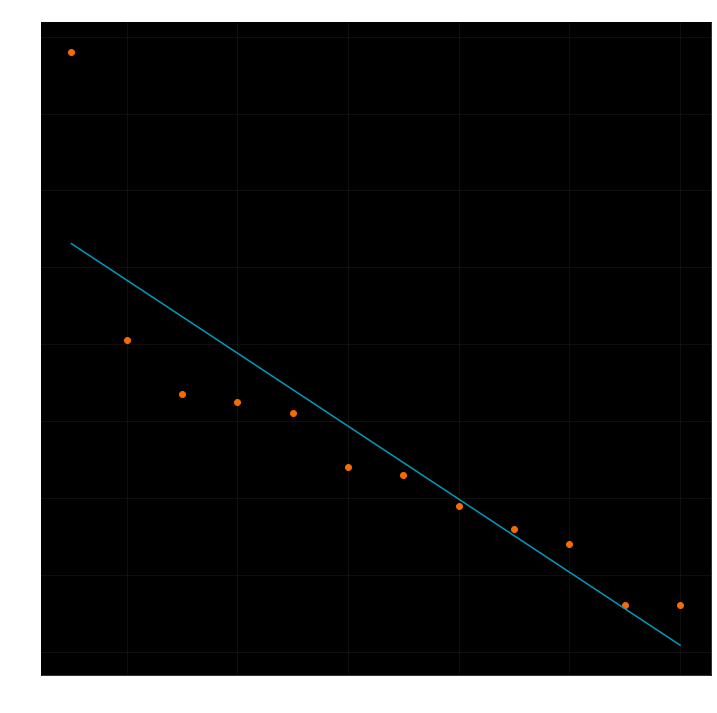

In [8]:
# plot model 1
fig = plt.figure(figsize=(12,12))
plt.title("MODEL 1", c='white')
plt.xlabel('YEAR', c='white')
plt.ylabel('GHIN', c='white')
plt.grid(visible=True, which='major', axis='both', alpha=0.1)

plt.scatter(year, ghin, c=RITOrange)
plt.plot(year, [model1(y) for y in year], c=RITBlue)

ax = plt.gca()
ax.set_facecolor("black")
ax.tick_params(colors='white')

### Model 2
$ y_i = a_1 x_i^2 + a_2 x_i + a_3 $

In [9]:
# construct new matrix, A, containing measurements of the independent variable(s)
a0 = np.array(year) ** 2
a = np.vstack([a0, a1, a2]).transpose()
print("Matrix 'A' with shape {}".format(a.shape))
print(a)

Matrix 'A' with shape (12, 3)
[[4044121.    2011.       1.]
 [4048144.    2012.       1.]
 [4052169.    2013.       1.]
 [4056196.    2014.       1.]
 [4060225.    2015.       1.]
 [4064256.    2016.       1.]
 [4068289.    2017.       1.]
 [4072324.    2018.       1.]
 [4076361.    2019.       1.]
 [4080400.    2020.       1.]
 [4084441.    2021.       1.]
 [4088484.    2022.       1.]]


In [10]:
# reconstruct pseudoinverse matrix, A_
a_ = np.dot(np.linalg.inv(np.dot(a.transpose(), a)), a.transpose())
print("Pseudoinverse Matrix 'A_' with shape {}".format(a_.shape))
print(a_)

Pseudoinverse Matrix 'A_' with shape (3, 12)
[[     0.01373645      0.00624384      0.00024975     -0.00424581
      -0.00724285     -0.00874138     -0.00874138     -0.00724285
      -0.00424581      0.00024975      0.00624384      0.01373645]
 [   -55.43755954    -25.21287672     -1.03173185     17.10587505
      29.19994398     35.25047495     35.25746796     29.220923
      17.14084008     -0.9827808     -25.14993965    -55.36063647]
 [ 55933.61789703  25452.62002373   1065.00144577 -17229.23783684
  -29430.0978241  -35537.57852173 -35551.6799202  -29472.40202141
  -17299.74482918    966.29165459  25325.70743561  55778.50251389]]


In [11]:
# calculate model 2 solution vector, x, containing model parameter estimates
x2 = np.dot(a_, b)
print("Solution Vector 'x2' with shape {}".format(x2.shape))
print(x2)

Solution Vector 'x2' with shape (3, 1)
[[     0.09543086]
 [  -385.82264266]
 [389975.77166138]]


In [12]:
# model 2
def model2(year):
    return x2[0] * year**2 + x2[1] * year + x2[2]

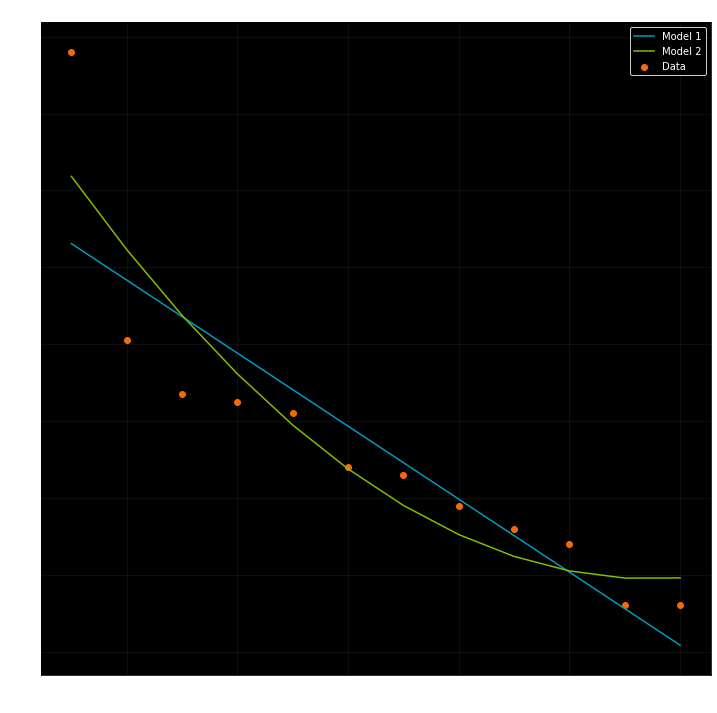

In [13]:
# plot model 1 & 2
fig = plt.figure(figsize=(12,12))
plt.title("MODELS", c='white')
plt.xlabel('YEAR', c='white')
plt.ylabel('GHIN', c='white')
plt.grid(visible=True, which='major', axis='both', alpha=0.1)

plt.scatter(year, ghin, c=RITOrange, label='Data')
plt.plot(year, [model1(y) for y in year], c=RITBlue, label='Model 1')
plt.plot(year, [model2(y) for y in year], c=RITGreen, label='Model 2')

legend = plt.legend(loc='upper right')
frame = legend.get_frame()
frame.set_facecolor('black')
frame.set_edgecolor('white')
for text in legend.get_texts():
    text.set_color("white")

ax = plt.gca()
ax.set_facecolor("black")
ax.tick_params(colors='white')

### Predictions

In [14]:
model1(2023)

array([7.21666667])

In [15]:
model2(2023)

array([10.11126868])

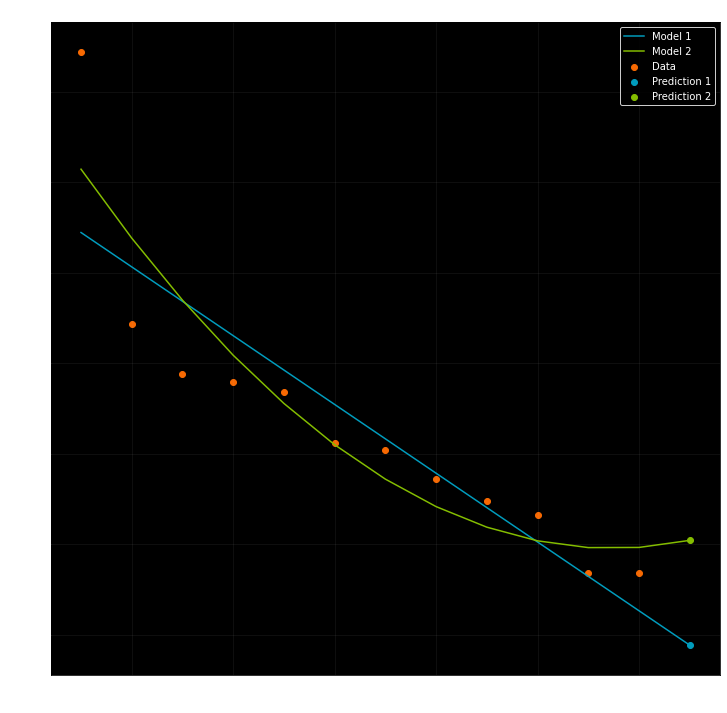

In [16]:
# plot model 1 & 2 with 2023 prediction
fig = plt.figure(figsize=(12,12))
plt.title("MODELS", c='white')
plt.xlabel('YEAR', c='white')
plt.ylabel('GHIN', c='white')
plt.grid(visible=True, which='major', axis='both', alpha=0.1)

plt.scatter(year, ghin, c=RITOrange, label='Data')
plt.plot(year + [2023], [model1(y) for y in year + [2023]], c=RITBlue, label='Model 1')
plt.scatter(2023, model1(2023), c=RITBlue, label='Prediction 1')
plt.plot(year + [2023], [model2(y) for y in year + [2023]], c=RITGreen, label='Model 2')
plt.scatter(2023, model2(2023), c=RITGreen, label='Prediction 2')

legend = plt.legend(loc='upper right')
frame = legend.get_frame()
frame.set_facecolor('black')
frame.set_edgecolor('white')
for text in legend.get_texts():
    text.set_color("white")

ax = plt.gca()
ax.set_facecolor("black")
ax.tick_params(colors='white')